In [ ]:
# The first step is always to get the data and then to load the relevant libraries 

import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline



## Steps we take to do EDA and cleaning 

1. look to see if the column names follow snake case 
2. Take a look at unique values
3. Take a look at the sum of nulls
4. See how the data is distributed 
5. If it's not normal, normalize it using np.log1p


In [3]:
df = pd.read_csv('data.csv')

Original column names:

Unique values in each column:

Make:
['BMW' 'Audi' 'FIAT' 'Mercedes-Benz' 'Chrysler' 'Nissan' 'Volvo' 'Mazda'
 'Mitsubishi' 'Ferrari' 'Alfa Romeo' 'Toyota' 'McLaren' 'Maybach'
 'Pontiac' 'Porsche' 'Saab' 'GMC' 'Hyundai' 'Plymouth' 'Honda'
 'Oldsmobile' 'Suzuki' 'Ford' 'Cadillac' 'Kia' 'Bentley' 'Chevrolet'
 'Dodge' 'Lamborghini' 'Lincoln' 'Subaru' 'Volkswagen' 'Spyker' 'Buick'
 'Acura' 'Rolls-Royce' 'Maserati' 'Lexus' 'Aston Martin' 'Land Rover'
 'Lotus' 'Infiniti' 'Scion' 'Genesis' 'HUMMER' 'Tesla' 'Bugatti']

Model:
['1 Series M' '1 Series' '100' '124 Spider' '190-Class' '2 Series' '200'
 '200SX' '240SX' '240' '2' '3 Series Gran Turismo' '3 Series' '300-Class'
 '3000GT' '300' '300M' '300ZX' '323' '350-Class' '350Z' '360' '370Z' '3'
 '4 Series Gran Coupe' '4 Series' '400-Class' '420-Class' '456M'
 '458 Italia' '4C' '4Runner' '5 Series Gran Turismo' '5 Series'
 '500-Class' '500e' '500' '500L' '500X' '550' '560-Class' '570S' '575M'
 '57' '599' '5' '6 Series Gran 

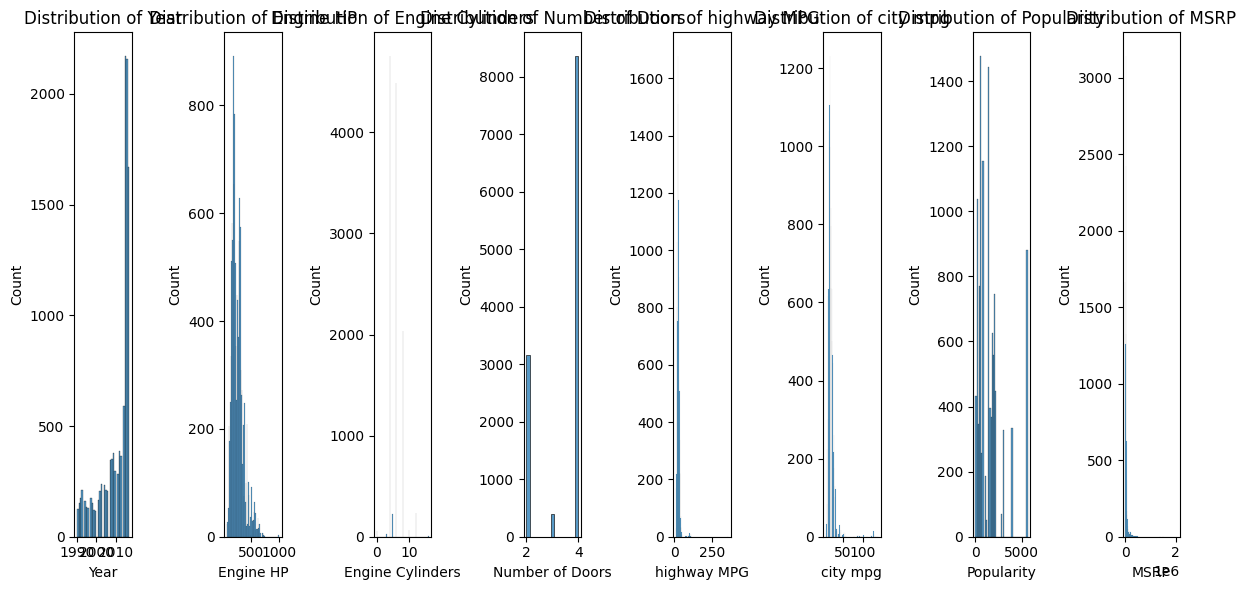

In [4]:
# 1. Check column names for snake case
print("Original column names:")
df.columns
# Example of converting to snake_case if needed:
# df.columns = df.columns.str.lower().str.replace(' ', '_')

# 2. Check unique values in each column
print("\nUnique values in each column:")
for col in df.columns:
    print(f"\n{col}:")
    print(df[col].unique())

# 3. Check null values
print("\nNull values count:")
print(df.isnull().sum())

# 4. Distribution check
plt.figure(figsize=(12, 6))
for i, col in enumerate(df.select_dtypes(include=[np.number]).columns):
    plt.subplot(1, len(df.select_dtypes(include=[np.number]).columns), i+1)
    sns.histplot(df[col])
    plt.title(f'Distribution of {col}')
plt.tight_layout()

# 5. Example of normalizing skewed data
# For numeric columns that show skewed distribution
numeric_cols = df.select_dtypes(include=[np.number]).columns
for col in numeric_cols:
    if df[col].skew() > 1:  # If data is positively skewed
        df[f'{col}_normalized'] = np.log1p(df[col])

## Shuffle and split the data set 

1. Take the length 
2. Shuffle it using numpy 
3. split it

In [ ]:
n= len(df)
n_train = int(0.6*n)
n_val = int(0.2*n)
n_test = n - (n_train + n_val)

np.random.seed(2)

# Need to shuffle the index to make it random
idx = np.arange(n)
np.random.shuffle(idx)

df_train = df.iloc[idx[:n_train]].copy()
df_val = df.iloc[idx[n_train:n_train+n_val]].copy()
df_test = df.iloc[idx[n_train+n_val:]].copy()
